# EQUIVALENCE CLASS:
A stimulus class (usually produced through conditional discrimination in matching-to-sample) that includes all possible emergent relations among its members. The properties of an equivalence class are derived from the logical relations of reflexivity, symmetry, and transitivity. **Reflexivity** *refers to the matching of a sample to itself*, sometimes called identity matching (AA, BB, CC, in these examples, each letter pair represents a sample and its matching comparison stimulus). **Symmetry** *refers to the reversibility of a relation (if AB, then BA)*. **Transitivity** *refers to the transfer of the relation to new combinations through shared membership (if AB and BC, then AC)*. 
If these properties are characteristics of a matching to-sample performance, then training AB and BC may produce AC, BA, CA, and CB as emergent relations (reflexivity provides the three other possible relations, AA, BB, and CC). Given AB and BC, for example, the combination of symmetry and transitivity implies the CA relation. The emergence of all possible stimulus relations after only AB and BC are trained through contingencies is the criterion for calling the three stimuli members of an equivalence class. The class can be extended by training new stimulus relations (e.g., if CD is learned, then AD, DA, BD, DB, and DC may be created as emergent relations). Stimuli that are members of an equivalence class are likely also to be functionally equivalent. It remains to be seen whether the logical properties of these classes are fully consistent with their behavioral ones. Cf. ** EQUIVALENCE RELATION**. ([source](http://www.scienceofbehavior.com/lms/mod/glossary/view.php?id=408&mode=letter&hook=E&sortkey=CREATION&sortorder=asc&fullsearch=0&page=3))
([Video](https://www.youtube.com/watch?v=En2OgGOICbA))


# Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score

%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sys
print("Python", sys.version)
import sklearn
print("Scikit-learn",sklearn.__version__)

Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Scikit-learn 0.22.1


In [3]:
!conda info


     active environment : sociadisticas
    active env location : C:\Users\Usuario\.conda\envs\sociadisticas
            shell level : 2
       user config file : C:\Users\Usuario\.condarc
 populated config files : C:\Users\Usuario\.condarc
          conda version : 4.8.3
    conda-build version : 3.18.11
         python version : 3.7.7.final.0
       virtual packages : 
       base environment : C:\ProgramData\Anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\ProgramData\Anaconda3\pkgs
                          C:\Users\Usuario\.conda\pkgs
                          C:\Users\Usuari

In [4]:
def view_trial(trial_labels,trial_values,trial_ans, n_trial, n_stimuli=6, n_classes=3, n_modes=6):
    print (n_trial,len(trial_labels))
    print (np.array(trial_values[n_trial]).reshape((n_stimuli,n_classes,n_modes)))
    print (trial_labels[n_trial])
    print (trial_ans[n_trial])

def create_trials(stims,pair,incl_nogo=True):
    #Take a set of stimuli and a set of pairs, then find the mode (letter) of the comparators and combines them.
    filt_tr=[pair[1][0]==stim[0] for stim in stims.keys()]# filter the simulus of the mode of the comparator
    comprs=np.array(list(stims.keys()))[filt_tr] # Get the set of comparators
    comprs_set_1=np.array([[p,q,r,s,t]for p in comprs for q in comprs for r in comprs for s in comprs for t in comprs])# all the combinations of the comparators
    if incl_nogo:
        comprs_filt=[(np.sum(cmpr_set==pair[1])<2) for cmpr_set in comprs_set_1]# <2 for target comparator and no answer.
    else:
        comprs_filt=[(np.sum(cmpr_set==pair[1])==1) for cmpr_set in comprs_set_1]#==1 for the presence of the target comparator ## <2 for target comparator and no answer.
    comprs_set=comprs_set_1[comprs_filt]# filtered set of comparators with the sample presented just once.
    train_labels=np.insert(comprs_set,0, pair[0], axis=1)# train labels with sample and comparators
    train_answers=np.array([(tr_lbl==pair[1])*1 for tr_lbl in comprs_set]) # Encoded answers for the trials. 
    train_values=np.array([[stims[stml]for stml in stmls] for stmls in train_labels])
    train_values=train_values.reshape((train_values.shape[0],(train_values.shape[1]*train_values.shape[2])))# create a list of the encoded values of the trial
    return train_labels,train_values,train_answers

def create_set(trials_pairs, stims, incl_nogo=True):
    trialset=[create_trials(stims,pair, incl_nogo) for pair in trials_pairs]
    labels=np.array([tr_lb for tr_pr in trialset for tr_lb in tr_pr[0]])
    values=np.array([tr_lb for tr_pr in trialset for tr_lb in tr_pr[1]])
    answer=np.array([tr_lb for tr_pr in trialset for tr_lb in tr_pr[2]])
    return labels,values,answer

In [5]:
stims={"A1":[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A2":[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A3":[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A4":[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A5":[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "A6":[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "TX":[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "B1":[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
       "B2":[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
       "B3":[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
       "B4":[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
       "B5":[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
       "B6":[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
       "TY":[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
       "C1":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
       "C2":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
       "C3":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
       "C4":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
       "C5":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0], # For explicitly train class emergency
       "C6":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0], # For explicitly train class emergency
       "TZ":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1] # For explicitly train class emergency
      }

options={"O_1":[1,0,0,0,0],
         "O_2":[0,1,0,0,0],
         "O_3":[0,0,1,0,0],
         "O_4":[0,0,0,1,0],
         "O_5":[0,0,0,0,1],
         "O_0":[0,0,0,0,0],
        }

## Clasifiers

In [6]:
h = .02  # step size in the mesh

names = [
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
#    "Gaussian Process",
    "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
    "AdaBoost",
    "Naive Bayes", 
    "QDA"
]

classifiers = [
    KNeighborsClassifier(3, n_jobs=-1),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, n_jobs=-1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

# Trainning 
### Relation $A_{n}-B_{n}$ and $B_{n}-C_{n}$

In [7]:
train_pairs=np.array([["A1","B1"],["B1","C1"],
                      ["A2","B2"],["B2","C2"],
                      ["A3","B3"],["B3","C3"],
                      ["A4","B4"],["B4","C4"],
                      ["A5","B5"],["B5","C5"],
                      ["A6","B6"],["B6","C6"],
                      ["TX","TY"],["TY","TZ"],
                      ["TX","TZ"], # Transitivity
                      ["TZ","TX"], # Equivalence 
                      ["TX","TX"],["TY","TY"],["TZ","TZ"], # Reflexivity
                      ["TY","TX"],["TZ","TY"]# Symmetry
                     ])

In [8]:
train_labels,train_values,train_answer=create_set(train_pairs, stims)

In [9]:
view_trial(train_labels,train_values,train_answer,random.randrange(len(train_labels)),n_modes=7)

64808 76008
[[[0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0]]]
['A6' 'B3' 'B1' 'B2' 'B4' 'B6']
[0 0 0 0 1]


### Full Dataset Trainning

In [10]:
avg_scores_train=[]
train_clasif=[]
for name, clf in zip(names, classifiers):
    clasif=OneVsRestClassifier(clf).fit(train_values, train_answer)
    train_clasif.append(clasif)
    scr=average_precision_score(train_answer,clasif.predict(train_values))
    avg_scores_train.append(scr)
    print(name,scr)

Nearest Neighbors 0.7384837053651399
Linear SVM 0.1005683612251342
RBF SVM 0.9894101455403274
Decision Tree 0.1031545653276622
Random Forest 0.1005683612251342
Neural Net 0.9830562328645238
AdaBoost 0.1005683612251342
Naive Bayes 0.10136501017267596


C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Usuario\.conda\envs\sociadisticas\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA 0.8544801278666176


In [11]:
train_clasif

[OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=-1, n_neighbors=3,
                                                    p=2, weights='uniform'),
                     n_jobs=None),
 OneVsRestClassifier(estimator=SVC(C=0.025, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=3,
                                   gamma='scale', kernel='linear', max_iter=-1,
                                   probability=False, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False),
                     n_jobs=None),
 OneVsRestClassifier(estimator=SVC(C=1, break

# Reflexivity evaluation

### Given the sample stimulus $A_{n}$ the agent must select $A_{n}$ among the comparator stimuli

In [12]:
reflexiv_pairs=np.array([[stm,stm]for stm in stims])
reflexivity_labels, reflexivity_values, reflexivity_answer =create_set(reflexiv_pairs, stims)

In [13]:
view_trial(reflexivity_labels,reflexivity_values,reflexivity_answer,random.randrange(len(reflexivity_labels)),n_modes=7)

35097 112836
[[[0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]
['A6' 'A4' 'A3' 'A3' 'A1' 'A3']
[0 0 0 0 0]


In [14]:
avg_scores_reflexivity=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(reflexivity_answer,clasif.predict(reflexivity_values))
    avg_scores_reflexivity.append(scr)
    print(name,scr)

Nearest Neighbors 0.10041457796160669
Linear SVM 0.10012761884504946
RBF SVM 0.10156129762543438
Decision Tree 0.10071137610790186
Random Forest 0.10012761884504946
Neural Net 0.10012761884504946
AdaBoost 0.10012761884504946
Naive Bayes 0.10030915691838813
QDA 0.10331566958995415


# Symmetry evaluation
### Given the trainning pairs, the agent must select the comparator $A_{n}$ in presence of the sample $B_{n}$  and the comparator $B_{n}$ in presence of the sample $C_{n}$ 

In [15]:
symmetry_pairs=np.array([[tr_pr[1],tr_pr[0]]for tr_pr in train_pairs])
symmetry_labels, symmetry_values, symmetry_answer =create_set(symmetry_pairs, stims)

In [16]:
view_trial(symmetry_labels,symmetry_values,symmetry_answer,random.randrange(len(symmetry_labels)),n_modes=7)

39440 76008
[[[0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]
['B4' 'A2' 'A5' 'A3' 'A4' 'A3']
[0 0 0 1 0]


In [17]:
avg_scores_symmetry=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(symmetry_answer,clasif.predict(symmetry_values))
    avg_scores_symmetry.append(scr)
    print(name,scr)

Nearest Neighbors 0.10337583126140841
Linear SVM 0.1005683612251342
RBF SVM 0.10692227390093781
Decision Tree 0.1031545653276622
Random Forest 0.1005683612251342
Neural Net 0.1005683612251342
AdaBoost 0.1005683612251342
Naive Bayes 0.10136501017267596
QDA 0.10458711620539715


# Transitivity
### Given the trainning pairs, the agent must select the comparator $C_{n}$ in presence of the sample $A_{n}$

In [18]:
transitivity_pairs=np.array([["A1","C1"],
                             ["A2","C2"],
                             ["A3","C3"],
                             ["A4","C4"],
                             ["A5","C5"],
                             ["A6","C6"]
                            ])

In [19]:
transitivity_labels, transitivity_values, transitivity_answer =create_set(transitivity_pairs, stims)

In [20]:
view_trial(transitivity_labels,transitivity_values,transitivity_answer,random.randrange(len(transitivity_labels)),n_modes=7)

125 37500
[[[1 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0]]]
['A1' 'C1' 'C3' 'C2' 'C2' 'C2']
[1 0 0 0 0]


In [21]:
avg_scores_transitivity=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(transitivity_answer,clasif.predict(transitivity_values))
    avg_scores_transitivity.append(scr)
    print(name,scr)

Nearest Neighbors 0.1
Linear SVM 0.1
RBF SVM 0.1
Decision Tree 0.1
Random Forest 0.1
Neural Net 0.1
AdaBoost 0.1
Naive Bayes 0.1
QDA 0.1


# Equivalence
### Given the trainning pairs, the agent must select the comparator $A_{n}$ in presence of the sample $C_{n}$

In [22]:
equivalence_pairs=np.array([[tr_pr[1],tr_pr[0]]for tr_pr in transitivity_pairs])

In [23]:
equivalence_labels, equivalence_values, equivalence_answer =create_set(equivalence_pairs, stims)

In [24]:
view_trial(equivalence_labels,equivalence_values,equivalence_answer,random.randrange(len(equivalence_labels)),n_modes=7)

36716 37500
[[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]
['C6' 'A5' 'A5' 'A5' 'A5' 'A3']
[0 0 0 0 0]


In [25]:
avg_scores_equivalence=[]
for name, clasif in zip(names, train_clasif):
    scr=average_precision_score(equivalence_answer,clasif.predict(equivalence_values))
    avg_scores_equivalence.append(scr)
    print(name,scr)

Nearest Neighbors 0.1
Linear SVM 0.1
RBF SVM 0.1
Decision Tree 0.1
Random Forest 0.1
Neural Net 0.1
AdaBoost 0.1
Naive Bayes 0.1
QDA 0.10461798415856645


# Results

In [26]:
results_df=pd.DataFrame(np.column_stack([avg_scores_train,avg_scores_reflexivity,avg_scores_symmetry,avg_scores_transitivity,avg_scores_equivalence]),index=names, columns=["Train", "Reflexivity", "Symmetry","Transitivity","Equivalence"])
results_df

,Train,Reflexivity,Symmetry,Transitivity,Equivalence
Nearest Neighbors,0.738484,0.100415,0.103376,0.1,0.100000
Linear SVM,0.100568,0.100128,0.100568,0.1,0.100000
RBF SVM,0.989410,0.101561,0.106922,0.1,0.100000
Decision Tree,0.103155,0.100711,0.103155,0.1,0.100000
Random Forest,0.100568,0.100128,0.100568,0.1,0.100000
Neural Net,0.983056,0.100128,0.100568,0.1,0.100000
AdaBoost,0.100568,0.100128,0.100568,0.1,0.100000
Naive Bayes,0.101365,0.100309,0.101365,0.1,0.100000
QDA,0.854480,0.103316,0.104587,0.1,0.104618


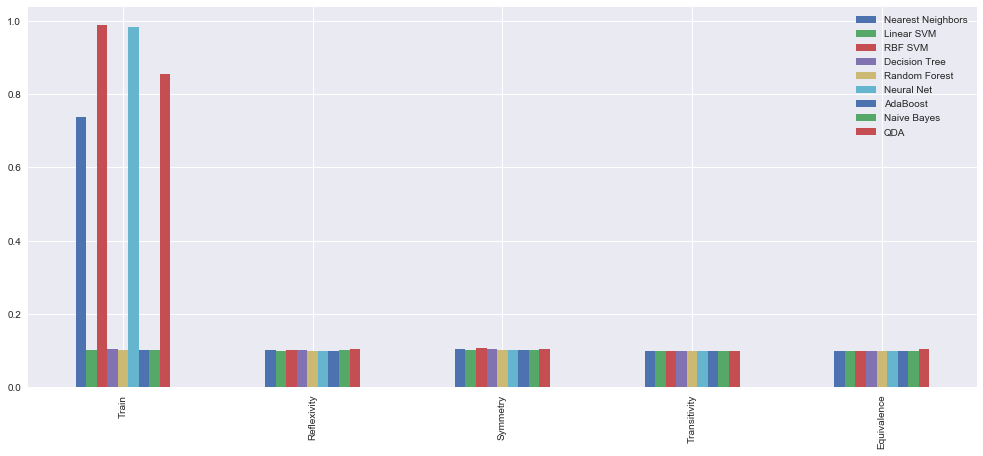

In [27]:
results_df.T.plot(kind="bar", figsize=(17,7))

# Verify performance clasifiers and separate trainning from testing.
There is possible that inside the train trials there are the test trials marked as no response.